# Step Length Distribution Analysis

Run simulations on different agent types and collect their step lengths.
Then analyse whether any of them follow power law distribution.

In [1]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
from parameters import Params
from simulation import Simulation
import matplotlib.pyplot as plt
from agent import ReservoirAgent, BrownianAgent, LévyAgent, ExponentialAgent
from environment import Environment

tolerance = 0.02

params = Params.from_json('parameters.json')
params.save = False
# single iteration only right now
params.iterations_per_epoch = 1
data = []
environment = Environment(params)

# Reservoir Agent
critical and chaotic

In [ ]:
params.type = 'reservoir'
params.agent = ReservoirAgent

params.standard_deviation = 0.032
sim = Simulation(params, params.agent)
population = sim.run_epoch(sim.set_up_population(None), environment)
step_lengths = np.array([])
for agent in population:
    step_counter = 1
    for output in agent.output_log:
        if abs(output) > 1 - tolerance or abs(output) < tolerance:
            step_counter += 1
        else:
            step_lengths = np.append(step_lengths, step_counter)
            step_counter = 1
data.append(step_lengths)

params.standard_deviation = 0.1
sim = Simulation(params, params.agent)
population = sim.run_epoch(sim.set_up_population(None), environment)
step_lengths = np.array([])
for agent in population:
    step_counter = 1
    for output in agent.output_log:
        if abs(output) > 1 - tolerance or abs(output) < tolerance:
            step_counter += 1
        else:
            step_lengths = np.append(step_lengths, step_counter)
            step_counter = 1
data.append(step_lengths)

# Lévy Agent

In [3]:
params.type = 'levy'
params.agent = LévyAgent
sim = Simulation(params, params.agent)
population = sim.run_epoch(sim.set_up_population(None), environment)
step_lengths = np.array([])
for agent in population:
    step_lengths = np.concatenate((step_lengths, agent.step_length_log))
data.append(step_lengths)

# Exponential Agent

In [4]:
params.type = 'exponential'
params.agent = ExponentialAgent
sim = Simulation(params, params.agent)
population = sim.run_epoch(sim.set_up_population(None), environment)
step_lengths = np.array([])
for agent in population:
    step_lengths = np.concatenate((step_lengths, agent.step_length_log))
data.append(step_lengths)

# Brownian Agent

In [5]:
params.type = 'brownian'
params.agent = BrownianAgent
sim = Simulation(params, params.agent)
population = sim.run_epoch(sim.set_up_population(None), environment)
step_lengths = np.array([])
for agent in population:
    step_lengths = np.concatenate((step_lengths, agent.step_length_log))
data.append(step_lengths)

# Visualization

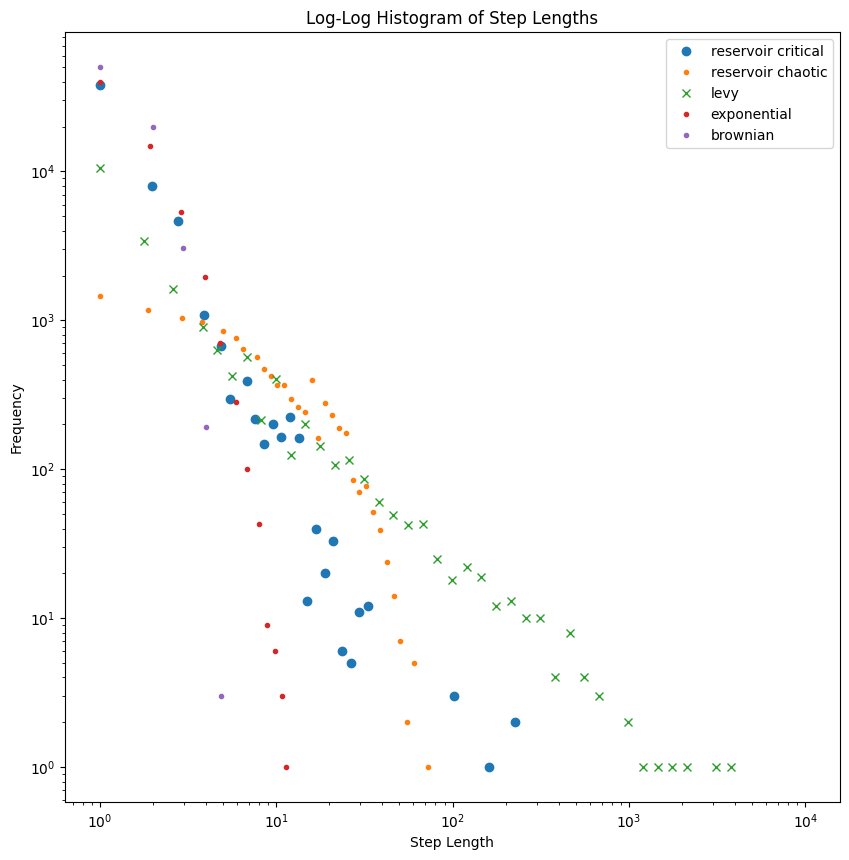

In [ ]:
counts_0, bins_0 = np.histogram(data[0], bins=np.logspace(np.log10(min(data[0])), np.log10(max(data[0])), 50))
counts_1, bins_1 = np.histogram(data[1], bins=np.logspace(np.log10(min(data[1])), np.log10(max(data[1])), 50))
counts_2, bins_2 = np.histogram(data[2], bins=np.logspace(np.log10(min(data[2])), np.log10(max(data[2])), 50))
counts_3, bins_3 = np.histogram(data[3], bins=np.logspace(np.log10(min(data[3])), np.log10(max(data[3])), 50))
counts_4, bins_4 = np.histogram(data[4], bins=np.logspace(np.log10(min(data[4])), np.log10(max(data[4])), 50))

plt.figure(figsize = (10,10))
plt.loglog(bins_0[:-1], counts_0, marker='o', linestyle='none', label='reservoir critical')
plt.loglog(bins_1[:-1], counts_1, marker='.', linestyle='none', label='reservoir chaotic')
plt.loglog(bins_2[:-1], counts_2, marker='x', linestyle='none', label='levy')
plt.loglog(bins_3[:-1], counts_3, marker='.', linestyle='none', label='exponential')
# plt.loglog(bins_4[:-1], counts_4, marker='.', linestyle='none', label='brownian')

plt.xlabel('Step Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Log-Log Histogram of Step Lengths')
plt.show()